In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.grid()
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [10]:
filenames='bajar1.csv'
df_ejemplo=pd.read_csv(filenames)
df_ejemplo

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.015973,0.105448,-0.429330,-0.080150,0.449296
1,0.025544,-0.081594,0.198323,0.330587,0.394052
2,0.035115,-0.068547,0.316031,0.554245,0.641686
3,0.044686,-0.023529,0.361865,0.685111,0.775163
4,0.054257,0.006653,0.331236,0.656098,0.735001
...,...,...,...,...,...
3677,35.208916,-0.364798,1.490261,2.322347,2.783388
3678,35.218487,-0.276711,1.478127,2.487735,2.906932
3679,35.228058,-0.578373,1.845597,2.481467,3.146175
3680,35.237630,-0.516519,1.703138,2.231086,2.853982


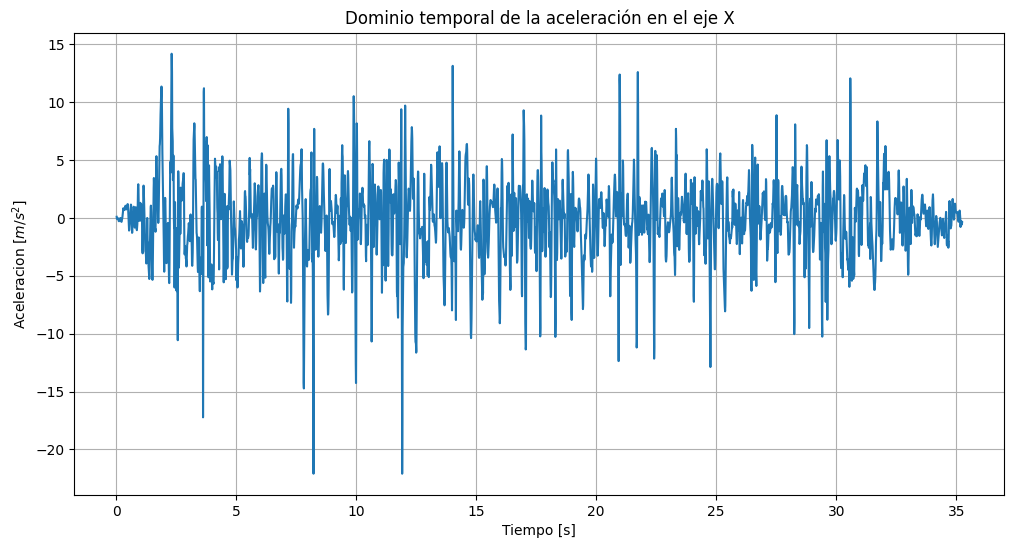

In [11]:
setup_graph('Dominio temporal de la aceleración en el eje X', 'Tiempo [s]', 'Aceleracion [$m/s^2$]', fig_size=(12,6))
plt.plot(df_ejemplo['Time (s)'], df_ejemplo['Linear Acceleration x (m/s^2)'])

In [12]:
T=df_ejemplo['Time (s)'].diff().mean()
fs=1/T
print('Fs= ',fs)

Fs=  104.48117392278114


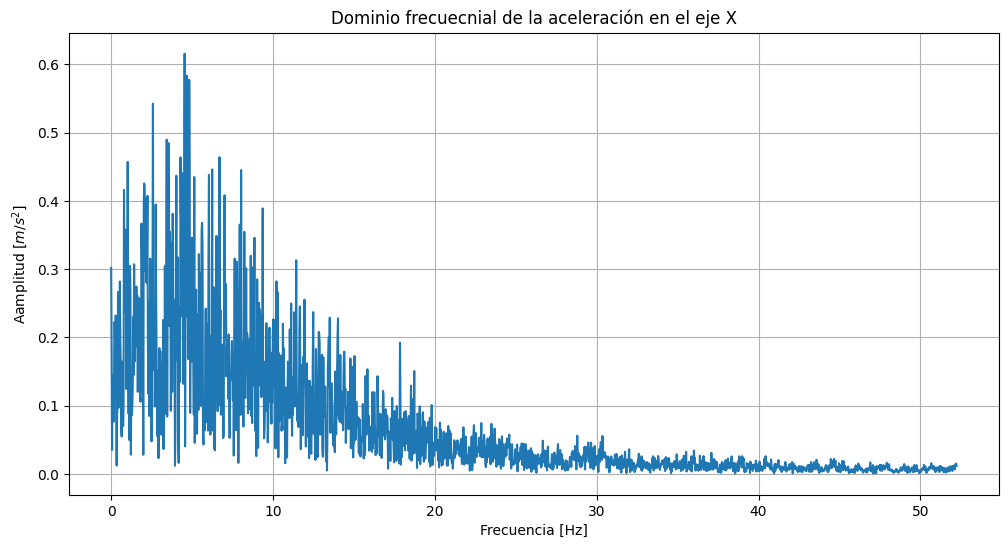

In [15]:
rfft_output = np.fft.rfft(df_ejemplo['Linear Acceleration x (m/s^2)'])
rfft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(rfft_output) for i in rfft_output]
rfreqs = [(i*1.0/len(df_ejemplo))*fs for i in range(len(df_ejemplo)//2+1)]

setup_graph('Dominio frecuecnial de la aceleración en el eje X', 'Frecuencia [Hz]', 'Aamplitud [$m/s^2$]', fig_size=(12,6))
plt.plot(rfreqs, rfft_mag)

In [17]:
print('Frecuencia dominante: ',rfreqs[np.argmax(rfft_mag)])
print('PSD: ',np.sum(rfft_mag))

Frecuencia dominante:  4.540192239990489
PSD:  119.04187645977265


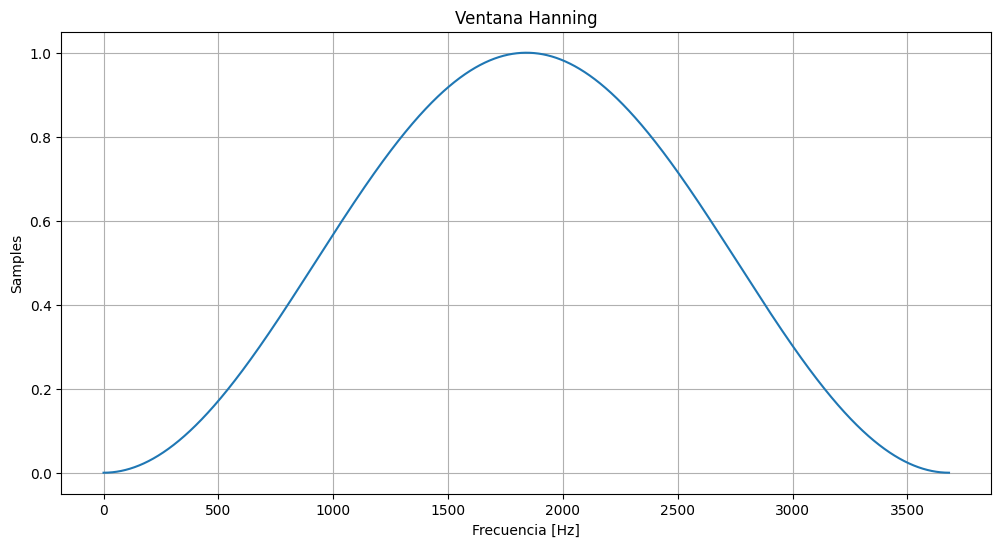

In [18]:
from scipy.signal import get_window
window=get_window("hann",len(df_ejemplo),fftbins=True)
setup_graph('Ventana Hanning', 'Frecuencia [Hz]', 'Samples', fig_size=(12,6))
plt.plot(window)

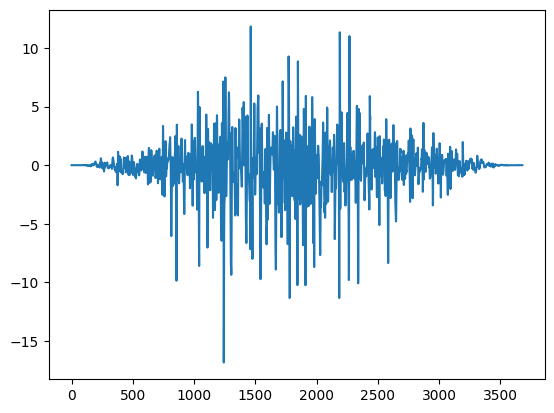

In [19]:
plt.plot(df_ejemplo['Linear Acceleration x (m/s^2)']*window)

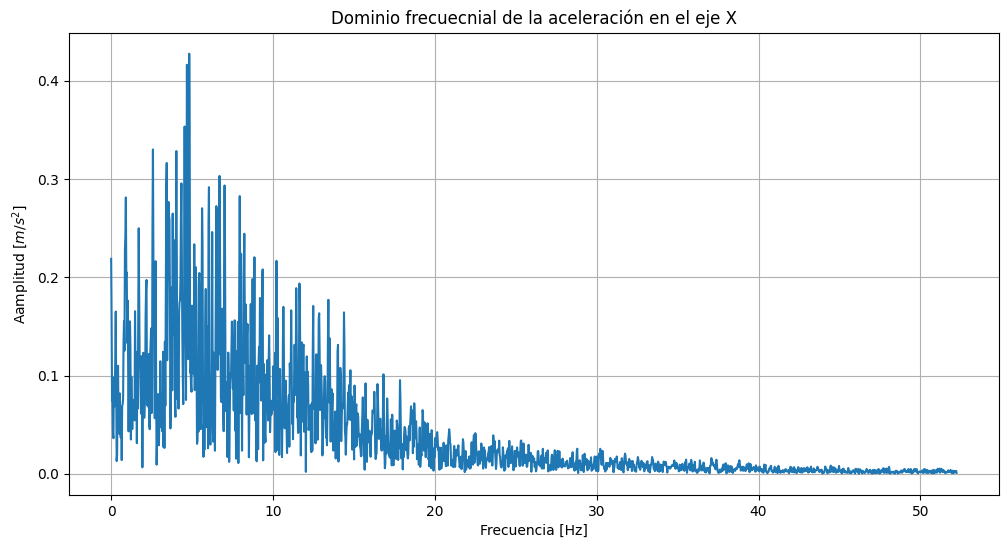

In [20]:
rfft_output = np.fft.rfft(df_ejemplo['Linear Acceleration x (m/s^2)']*window)
rfft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(rfft_output) for i in rfft_output]
rfreqs = [(i*1.0/len(df_ejemplo))*fs for i in range(len(df_ejemplo)//2+1)]

setup_graph('Dominio frecuecnial de la aceleración en el eje X', 'Frecuencia [Hz]', 'Aamplitud [$m/s^2$]', fig_size=(12,6))
plt.plot(rfreqs, rfft_mag)

In [21]:
print('Frecuencia dominante: ',rfreqs[np.argmax(rfft_mag)])
print('PSD: ',np.sum(rfft_mag))

Frecuencia dominante:  4.823954254989895
PSD:  73.2549955430981


In [22]:
def Myfft(Fs, X):
    from scipy.signal import get_window
    window = get_window("hann", len(X), fftbins=True)
    X=X*window
    ##
    fft_out = np.fft.rfft(X)
    fft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]
    num_samples = len(X)
    rfreqs = [(i*1.0/num_samples)*Fs for i in range(num_samples//2+1)]
    return fft_mag, rfreqs

In [23]:
#Funcion para obtener
def freq_features(raw_df, window_size=1000,step_size=500):
    data=[]
    for i in range(0, len(raw_df) - window_size + 1, step_size):

        window_data_X = raw_df.iloc[i:i+window_size,1] #X_axis
        window_data_Y = raw_df.iloc[i:i+window_size,2] #Y_axis
        window_data_Z = raw_df.iloc[i:i+window_size,3] #Z_axis

        fft_mag_X, fft_freq=Myfft(fs,window_data_X)
        fft_mag_Y, _ =Myfft(fs,window_data_Y)
        fft_mag_Z, _ =Myfft(fs,window_data_Z)
        data.append([fft_freq[np.argmax(fft_mag_X)],np.sum(fft_mag_X),fft_freq[np.argmax(fft_mag_Y)],np.sum(fft_mag_Y),fft_freq[np.argmax(fft_mag_Z)],np.sum(fft_mag_Z)])

    freq_features = pd.DataFrame(data,columns=['DF X', 'PSD X','DF Y', 'PSD Y','DF Z', 'PSD Z'])
    return freq_features

In [24]:
freq_features(df_ejemplo)

,DF X,PSD X,DF Y,PSD Y,DF Z,PSD Z
0,2.089623,43.501164,1.985142,59.759753,1.880661,50.193413
1,7.940569,45.185257,1.776180,67.724027,6.268870,79.527616
2,3.552360,40.605433,1.671699,57.478490,1.671699,57.914920
3,4.806134,36.778947,1.776180,50.156238,6.477833,60.538528
4,4.701653,31.211092,1.671699,44.805045,2.612029,55.848806
5,4.492690,34.981352,1.671699,53.880921,2.716511,69.133834
